In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
clk=pd.read_excel('Clickstream.xlsx',usecols=12)

### Dropping rows with null values

In [10]:
print (clk.isnull().sum())
clk=clk.dropna(how='any',axis=0)

ip                            0
login_or_not                  0
#page_view                    0
page_view_time_seconds_avg    0
#page_product_view            0
page_product_time_avg         1
number_searches               0
#times_check_shoppingcart     0
read_Q&A                      0
read_product_definition       0
previous_site                 0
time_of_day                   0
purchase                      0
dtype: int64


### Convert categorical values to binary

In [11]:
prev_site=pd.get_dummies(clk['previous_site'],drop_first=True)
time_day=pd.get_dummies(clk['time_of_day'],drop_first=True)

prev_site.columns=['PS_SearchEngine','PS_Email','PS_Ads','PS_Other']
time_day.columns=['TD_Noon','TD_AfterNoon','TD_Eve']

clk=pd.concat([clk,prev_site,time_day],axis=1)
clk.drop(['previous_site','time_of_day'],inplace=True,axis=1)

In [24]:
#pd.get_dummies(clk['previous_site'],drop_first=True)

In [12]:
len(clk['ip']),(len(clk['ip'].unique()))

(405919, 64381)

In [13]:
clk.dtypes

ip                              int64
login_or_not                    int64
#page_view                      int64
page_view_time_seconds_avg    float64
#page_product_view              int64
page_product_time_avg         float64
number_searches                 int64
#times_check_shoppingcart       int64
read_Q&A                        int64
read_product_definition         int64
purchase                        int64
PS_SearchEngine                 uint8
PS_Email                        uint8
PS_Ads                          uint8
PS_Other                        uint8
TD_Noon                         uint8
TD_AfterNoon                    uint8
TD_Eve                          uint8
dtype: object

In [14]:
clk['ip']=clk['ip'].astype(str)
clk['page_view_time_seconds_avg'] = clk['page_view_time_seconds_avg'].round()
clk.head()

,ip,login_or_not,#page_view,page_view_time_seconds_avg,#page_product_view,page_product_time_avg,number_searches,#times_check_shoppingcart,read_Q&A,read_product_definition,purchase,PS_SearchEngine,PS_Email,PS_Ads,PS_Other,TD_Noon,TD_AfterNoon,TD_Eve
0,18353986,0,10,56.0,0,0.0,3,0,0,1,0,1,0,0,0,0,0,0
1,18356284,0,7,6.0,1,0.0,1,0,0,0,0,0,0,0,1,0,0,0
2,18357390,0,3,5.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,1
3,18357390,0,7,5.0,1,0.0,1,0,0,0,0,0,0,0,1,0,0,1
4,18357851,0,8,144.0,0,0.0,1,0,0,1,0,1,0,0,0,0,1,0


# Correlation
Using Correlation to see which features are positively correlated with purchases. This would also help us determine which features we must be using for predicting the purchases.


In [39]:
correlations = clk.corr(method='pearson')
print(correlations)

                            login_or_not  #page_view  \
login_or_not                    1.000000    0.288008   
#page_view                      0.288008    1.000000   
page_view_time_seconds_avg      0.091929    0.248922   
#page_product_view              0.127944    0.580278   
page_product_time_avg           0.084760    0.227354   
number_searches                 0.145603    0.541134   
#times_check_shoppingcart       0.155975    0.386877   
read_Q&A                       -0.122597   -0.103281   
read_product_definition        -0.035874   -0.003708   
purchase                        0.240744    0.416779   
PS_SearchEngine                -0.028486    0.010792   
PS_Email                        0.059167    0.036822   
PS_Ads                         -0.007829   -0.008431   
PS_Other                        0.020881    0.051487   
TD_Noon                        -0.000353    0.011295   
TD_AfterNoon                    0.017324    0.017357   
TD_Eve                         -0.005319   -0.00

Skewness 
Skewness helps us determine what are the features that is skewed normally towards the mean.

In [40]:
skew = clk.skew()
print(skew)

ip                             0.323797
login_or_not                   6.105696
#page_view                    13.513009
page_view_time_seconds_avg     7.976575
#page_product_view            20.260739
page_product_time_avg         19.412996
number_searches               12.026018
#times_check_shoppingcart     36.750070
read_Q&A                       0.369333
read_product_definition        1.275040
purchase                       7.134253
PS_SearchEngine                0.273214
PS_Email                      14.743635
PS_Ads                        19.557442
PS_Other                       1.281645
TD_Noon                        2.263847
TD_AfterNoon                   1.240777
TD_Eve                         0.960388
dtype: float64


### Feature Extraction
Dropping Ip's as no correlation found for Ip with purchases.

In [15]:
X=clk[clk.columns.difference(['ip','purchase'])]
y=clk['purchase']

# Splitting the Data into train and Test

In [16]:
indices = range(X.shape[0])
num_training_indices = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:num_training_indices]
test_indices = indices[num_training_indices:]

# split the actual data
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

### Logistic Regression model

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred=model.predict(X_test)

### Evaluation metrics

In [45]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

u'             precision    recall  f1-score   support\n\n          0       0.99      1.00      0.99     79720\n          1       0.70      0.35      0.47      1464\n\navg / total       0.98      0.99      0.98     81184\n'

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score

In [47]:
confusion_matrix(y_test,y_pred)

array([[79501,   219],
       [  949,   515]], dtype=int64)

In [48]:
(accuracy_score(y_test,y_pred)*100).round(),(recall_score(y_test,y_pred)*100).round()

(99.0, 35.0)

In [49]:
model.coef_

array([[-1.34703690e-01,  1.63765698e-01,  1.65228990e-01,
        -1.78885057e+00,  2.32549457e-01, -5.27172565e-01,
        -4.05105716e-01,  3.64413573e-01,  5.66762712e-01,
         4.17198631e-01,  7.98843616e-01, -1.71901443e-01,
         2.78067795e-03,  3.18044134e-03, -1.15916858e+01,
        -1.03545426e+01]])

### Features and its coefficients

In [57]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients.columns=['Features','Coeff_Values']
coefficients['Odds']=np.exp(coefficients['Coeff_Values'])
coefficients.sort_values(by=['Odds'],ascending=False,inplace=True)
coefficients.reset_index().drop(['index'], axis=1)
coefficients

,Features,Coeff_Values,Odds
10,login_or_not,0.873832,2.396075
8,TD_Eve,0.593730,1.810731
9,TD_Noon,0.454276,1.575032
7,TD_AfterNoon,0.408032,1.503855
4,PS_Email,0.270585,1.310731
2,#times_check_shoppingcart,0.177262,1.193944
1,#page_view,0.165699,1.180217
13,page_view_time_seconds_avg,0.003050,1.003054
12,page_product_time_avg,0.002805,1.002809
0,#page_product_view,-0.134235,0.874385


### Lift Chart

Lift chart shows which percentage of all targets is reached when addressing a certain percentage of population.

In [ ]:
predicted_probas = model.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas, figsize=(6,6))
plt.show()

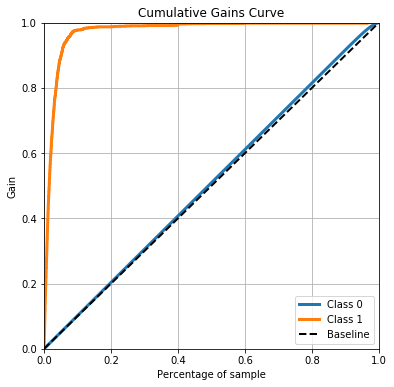

### Confidence Interval (95%)

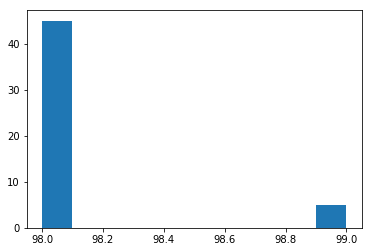

95.0 confidence interval 98.0% and 100.0%


In [61]:
import numpy
from sklearn.model_selection import train_test_split
stats = list()
for i in np.linspace(10,100,dtype=int): 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=i)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100).round()
    stats.append(score)
plt.hist(stats)
plt.show()

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower, upper*100))

# P values
Most of the p values are lesser than 0.05 this falsifies our null hypothesis.

In [62]:
from sklearn.feature_selection import chi2

In [65]:
scores, pvalues = chi2(X, y)
pvalues

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.58419863e-004,
       2.45883229e-193, 3.62910599e-001, 6.35489953e-004, 8.86094297e-021,
       4.01489287e-012, 1.86884268e-006, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

# KNN model 

In [66]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [67]:
y_pred = classifier.predict(X_test) 

# Evaluation Metrics

In [68]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[119199    346]
 [  1441    790]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99    119545
          1       0.70      0.35      0.47      2231

avg / total       0.98      0.99      0.98    121776



In [69]:
accuracy_score(y_test,y_pred)*100

98.53255157009592

In [ ]:
#error = []
# Calculating error for K values between 1 and 40
#for i in range(5, 15):  
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train, y_train)
#    pred_i = knn.predict(X_test)
#    error.append(np.mean(pred_i != y_test))

In [ ]:
#plt.figure(figsize=(12, 6))  
#plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
#         markerfacecolor='blue', markersize=10)
#plt.title('Error Rate K Value')  
#plt.xlabel('K Value')  
#plt.ylabel('Mean Error')

# Decision Trees.

In [70]:
X = clk.drop(['purchase','ip'],axis = 1)

In [71]:
y = clk['purchase']

In [72]:
print (X.shape) 

(405919, 16)


In [73]:
import random 
from random import shuffle

In [74]:
indices = range(X.shape[0])
num_training_indices = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train_indices = indices[:num_training_indices]
test_indices = indices[num_training_indices:]

# split the actual data
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

In [75]:
y = clk['purchase']

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree = DecisionTreeClassifier()

In [78]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[78975   663]
 [  622   924]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99     79638
          1       0.58      0.60      0.59      1546

avg / total       0.98      0.98      0.98     81184



## RANDOM FOREST

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[79328   325]
 [  620   911]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99     79653
          1       0.74      0.60      0.66      1531

avg / total       0.99      0.99      0.99     81184



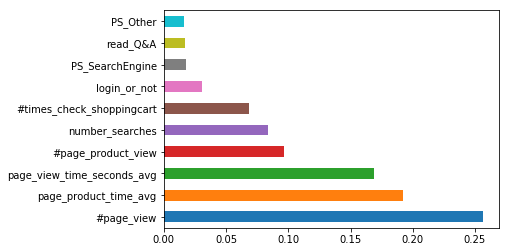

In [22]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [87]:
dtree = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [88]:
predict3 = dtree.predict(X_train)
print(predict3)

[0 0 0 ... 0 0 0]


In [89]:
score2 = dtree.score(X_test, y_test)
score2

0.9831863421363816

# Cross Validation

In [90]:
from sklearn.cross_validation import cross_val_score,cross_val_predict
from pprint import pprint
from sklearn import metrics

C:\Users\lavanyameenakshi\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [92]:
depth = []
for i in range(3,12):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 9-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=9, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.9832873119985089), (4, 0.9833488977881731), (5, 0.9850315035800536), (6, 0.9858444734187146), (7, 0.9864406529426577), (8, 0.986992487388036), (9, 0.9875024387226043), (10, 0.9873817264346229), (11, 0.9872807209220391)]
